#  Metabolic Syndrome

### Required Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io as sio
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from numpy import absolute
from numpy import sqrt
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
#from sklearn.inspection import plot_partial_dependence
#from sklearn.metrics import classification_report, recall_score, plot_confusion_matrix, plot_precision_recall_curve, roc_curve
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
#import matplotlib as mlp
#from matplotlib import Artist
#from matplotlib.artist import Artist
#import seaborn as sns
import warnings
import optuna
from optuna.samplers import TPESampler
from tqdm import tqdm
from pycaret.classification import *

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
data = pd.read_csv('Metabolic Syndrome - Copy.csv')
data

AG      GD       MT      IL           EB    WCM   BMI     UC   UA  BGL  \
0     22    Male   Single  8200.0        White   81.0  23.3   3.88  4.9   92   
1     44  Female  Married  4500.0        White   80.1  23.2   8.55  4.5   82   
2     21    Male   Single   800.0        Asian   69.6  20.1   5.07  5.4  107   
3     43  Female   Single  2000.0        Black  120.4  33.3   5.22  5.0  104   
4     51    Male  Married     NaN        Asian   81.1  20.1   8.13  5.0   95   
...   ..     ...      ...     ...          ...    ...   ...    ...  ...  ...   
2396  48  Female  Married  1000.0        Other    NaN  59.7  22.11  5.8  152   
2397  30  Female   Single  2000.0        Asian    NaN  18.0   2.90  7.9   91   
2398  28    Male   Single   800.0  MexAmerican  100.8  29.4   2.78  6.2   99   
2399  27    Male  Married  8200.0  MexAmerican  106.6  31.3   4.15  6.2  100   
2400  60    Male   Single  6200.0        White  106.6  27.5  12.82  5.2   91   

      HDL   TL  MS  
0      41   84   0  
1      28   56   0  
2      43   78   0  
3      73  141   0  
4      43  126   0  
...   ...  ...  ..  
2396   57  107   0  
2397   90   91   0  
2398   47   84   0  
2399   41  124   1  
2400   36  226   1  

[2401 rows x 13 columns]

In [5]:
data.columns

Index(['AG', 'GD', 'MT', 'IL', 'EB', 'WCM', 'BMI', 'UC', 'UA', 'BGL', 'HDL',
       'TL', 'MS'],
      dtype='object')

In [6]:
data.shape

(2401, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AG      2401 non-null   int64  
 1   GD      2401 non-null   object 
 2   MT      2193 non-null   object 
 3   IL      2284 non-null   float64
 4   EB      2401 non-null   object 
 5   WCM     2316 non-null   float64
 6   BMI     2375 non-null   float64
 7   UC      2401 non-null   float64
 8   UA      2401 non-null   float64
 9   BGL     2401 non-null   int64  
 10  HDL     2401 non-null   int64  
 11  TL      2401 non-null   int64  
 12  MS      2401 non-null   int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 244.0+ KB


In [8]:
# label_encoder = preprocessing.LabelEncoder()
# data['GD']= label_encoder.fit_transform(data['GD'])

# data['GD'].unique()

In [9]:
# label_encoder = preprocessing.LabelEncoder()
# data['MT']= label_encoder.fit_transform(data['MT'])

# data['MT'].unique()

In [10]:
# label_encoder = preprocessing.LabelEncoder()
# data['EB']= label_encoder.fit_transform(data['EB'])

# data['EB'].unique()

In [11]:
# Label Encoding
# Race Column
race_mapping = {'White': 0, 'Black': 1, 'Asian': 2, 'Hispanic': 3, 'MexAmerican': 4, 'Other': 5}
data['EB'] = data['EB'].map(race_mapping)

# Sex Column
sex_mapping = {'Male': 1, 'Female': 0}
data['GD'] = data['GD'].map(sex_mapping)

# Marital Column
marital_mapping = {'Married': 1, 'Single': 0, 'Divorced': 3, 'Widowed': 4, 'Separated': 5}
data['MT'] = data['MT'].map(marital_mapping)

In [12]:
data.isnull().sum()

AG       0
GD       0
MT     208
IL     117
EB       0
WCM     85
BMI     26
UC       0
UA       0
BGL      0
HDL      0
TL       0
MS       0
dtype: int64

<Axes: >

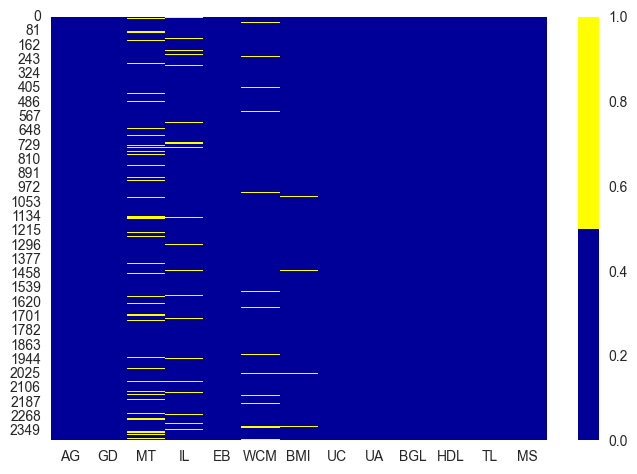

In [13]:
cols =data.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

# Data Preprocessing

In [14]:
# Fill null values in 'Income', 'WaistCirc', and 'BMI' with the mean
data['MT'] = data['MT'].fillna(data['MT'].mean())
data['IL'] = data['IL'].fillna(data['IL'].mean())
data['WCM'] = data['WCM'].fillna(data['WCM'].mean())
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())

In [15]:
data.isnull().sum()

AG     0
GD     0
MT     0
IL     0
EB     0
WCM    0
BMI    0
UC     0
UA     0
BGL    0
HDL    0
TL     0
MS     0
dtype: int64

Filled the null values of Income, WaistCirc and BMI
Now I will label encode categorical values to turn them into numerical values and then deal with the null values of Marital and Column later.

In [16]:
print(data['MT'].value_counts())
print(data['GD'].value_counts())
print(data['MT'].value_counts())

MT
1.000000    1192
0.000000     498
3.000000     242
1.393981     208
4.000000     166
5.000000      95
Name: count, dtype: int64
GD
0    1211
1    1190
Name: count, dtype: int64
MT
1.000000    1192
0.000000     498
3.000000     242
1.393981     208
4.000000     166
5.000000      95
Name: count, dtype: int64


Now I will do label encoding of these 3 features.

In [17]:
data.isnull().sum()

AG     0
GD     0
MT     0
IL     0
EB     0
WCM    0
BMI    0
UC     0
UA     0
BGL    0
HDL    0
TL     0
MS     0
dtype: int64

<Axes: >

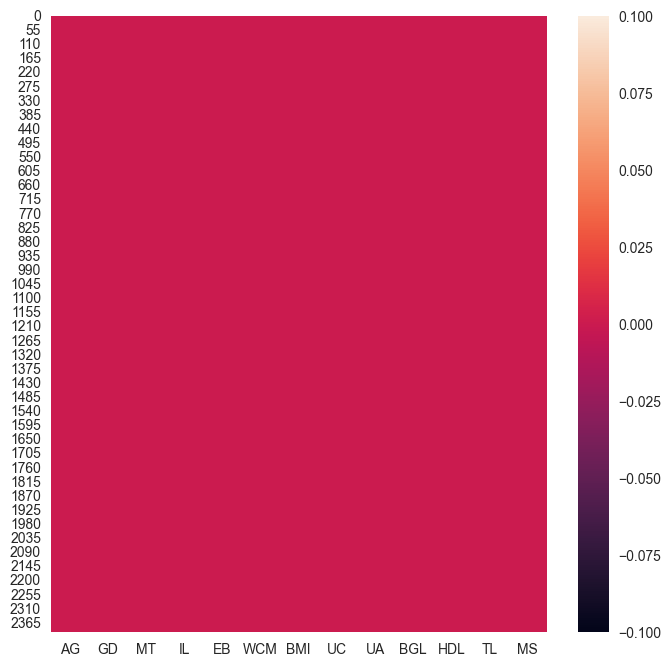

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull())

Steps so far:
1. Libraries Installation
2. Data Loading
3. Data Description
4. Data Preprocessing
    a) Checking null values
    b) Filling null values using the Mean method
    c) Label encoding categorical features
    d) Filling null values on the left out columns.

In [19]:
data.head()

AG  GD   MT          IL  EB    WCM   BMI    UC   UA  BGL  HDL   TL  MS
0  22   1  0.0  8200.00000   0   81.0  23.3  3.88  4.9   92   41   84   0
1  44   0  1.0  4500.00000   0   80.1  23.2  8.55  4.5   82   28   56   0
2  21   1  0.0   800.00000   2   69.6  20.1  5.07  5.4  107   43   78   0
3  43   0  0.0  2000.00000   1  120.4  33.3  5.22  5.0  104   73  141   0
4  51   1  1.0  4005.25394   2   81.1  20.1  8.13  5.0   95   43  126   0

In [20]:
data.describe().T

count         mean          std    min      25%      50%          75%  \
AG   2401.0    48.691795    17.632852   20.0    34.00    48.00    63.000000   
GD   2401.0     0.495627     0.500085    0.0     0.00     0.00     1.000000   
MT   2401.0     1.393981     1.313329    0.0     1.00     1.00     1.393981   
IL   2401.0  4005.253940  2881.128031  300.0  1600.00  3500.00  6200.000000   
EB   2401.0     1.388588     1.472023    0.0     0.00     1.00     2.000000   
WCM  2401.0    98.307254    15.962233   56.2    87.00    97.50   107.200000   
BMI  2401.0    28.702189     6.626057   13.4    24.00    27.80    32.000000   
UC   2401.0    43.626131   258.272829    1.4     4.45     7.07    13.690000   
UA   2401.0     5.489046     1.439358    1.8     4.50     5.40     6.400000   
BGL  2401.0   108.247813    34.820657   39.0    92.00    99.00   110.000000   
HDL  2401.0    53.369429    15.185537   14.0    43.00    51.00    62.000000   
TL   2401.0   128.125364    95.322477   26.0    75.00   103.00   150.000000   
MS   2401.0     0.342357     0.474597    0.0     0.00     0.00     1.000000   

        max  
AG     80.0  
GD      1.0  
MT      5.0  
IL   9000.0  
EB      5.0  
WCM   176.0  
BMI    68.7  
UC   5928.0  
UA     11.3  
BGL   382.0  
HDL   156.0  
TL   1562.0  
MS      1.0

In [21]:
print(data['MS'].value_counts())

MS
0    1579
1     822
Name: count, dtype: int64


### Class Balancing

In [22]:
df_majority = data[data.MS==0]
df_minority = data[data.MS==1]
print(df_majority.shape)
print(df_minority.shape)

(1579, 13)
(822, 13)


In [23]:
df_manjority_downsampled = resample(df_majority,replace=True,n_samples=810,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.MS.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_monority_upsampled = resample(df_minority,replace=True,n_samples=1510,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:->\n",df_upsampled.MS.value_counts())

Downsampled data:->
 MS
1    822
0    810
Name: count, dtype: int64
Upsampled data:->
 MS
0    1579
1    1510
Name: count, dtype: int64


In [24]:
df_upsampled.describe().T

count         mean          std    min      25%          50%  \
AG   3089.0    50.296212    17.511339   20.0    36.00    50.000000   
GD   3089.0     0.503399     0.500069    0.0     0.00     1.000000   
MT   3089.0     1.439216     1.328350    0.0     1.00     1.000000   
IL   3089.0  3930.145610  2847.117019  300.0  1600.00  3500.000000   
EB   3089.0     1.376821     1.483216    0.0     0.00     1.000000   
WCM  3089.0   100.573507    15.966144   56.2    90.10    99.400000   
BMI  3089.0    29.486941     6.591610   13.4    24.80    28.702189   
UC   3089.0    49.162049   279.480513    1.4     4.62     7.500000   
UA   3089.0     5.584008     1.470285    1.8     4.60     5.500000   
BGL  3089.0   112.848171    40.249102   39.0    94.00   102.000000   
HDL  3089.0    51.425380    14.867365   14.0    41.00    49.000000   
TL   3089.0   142.353836   107.328913   26.0    79.00   114.000000   
MS   3089.0     0.488831     0.499956    0.0     0.00     0.000000   

             75%     max  
AG     64.000000    80.0  
GD      1.000000     1.0  
MT      1.393981     5.0  
IL   6200.000000  9000.0  
EB      2.000000     5.0  
WCM   109.800000   176.0  
BMI    33.100000    68.7  
UC     14.870000  5928.0  
UA      6.500000    11.3  
BGL   114.000000   382.0  
HDL    59.000000   156.0  
TL    169.000000  1562.0  
MS      1.000000     1.0

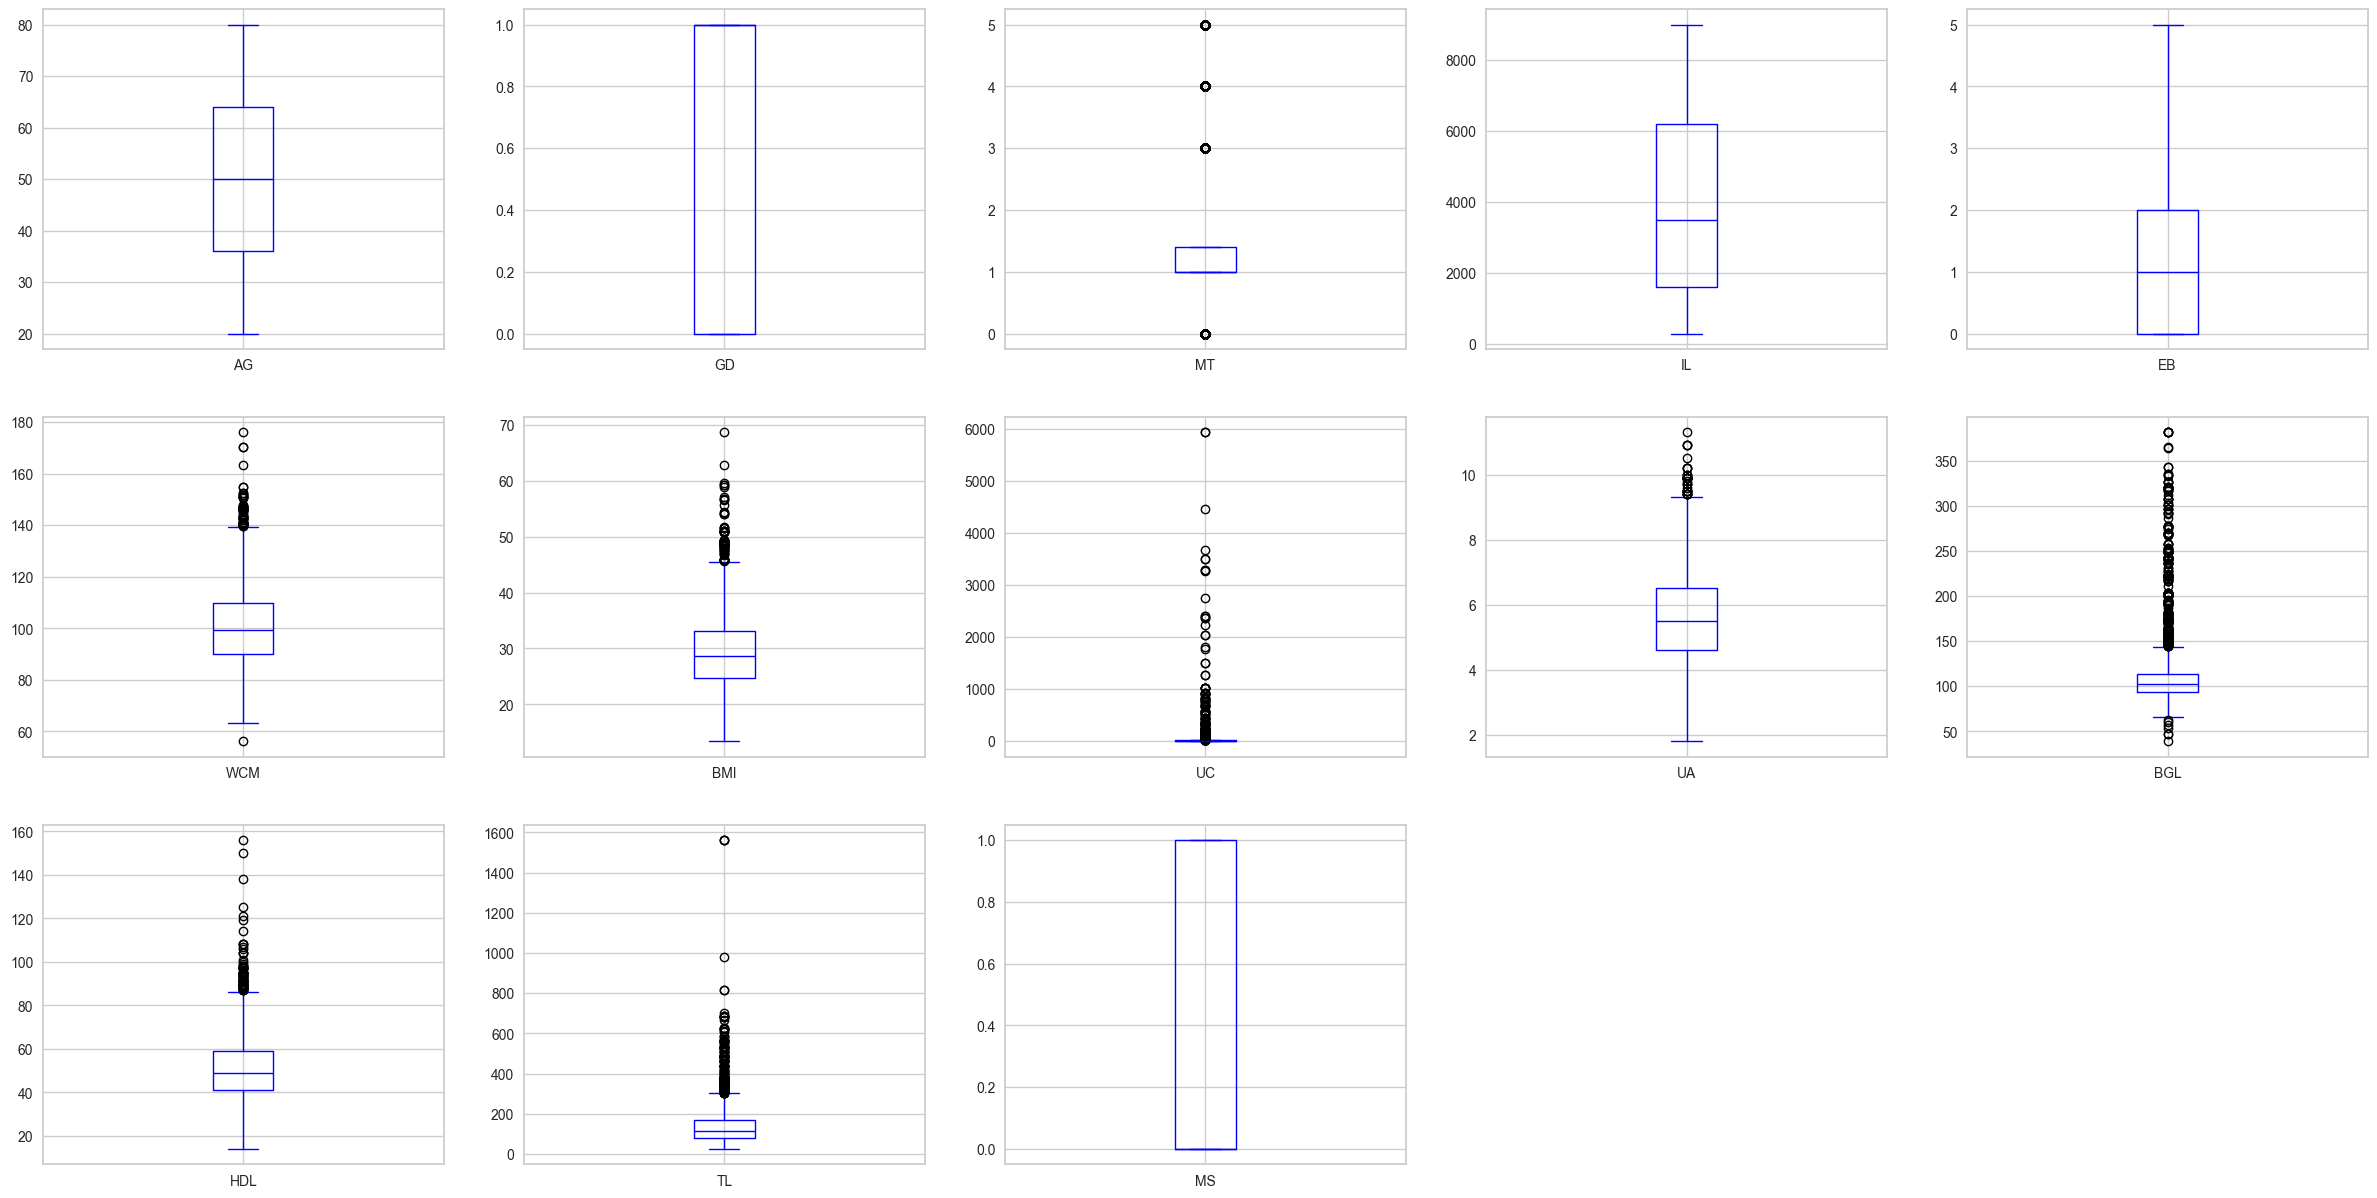

In [25]:
#boxplot
df_upsampled.plot(color = 'blue', kind='box', figsize=(30, 15), subplots=True, layout=(3,5))
plt.show()

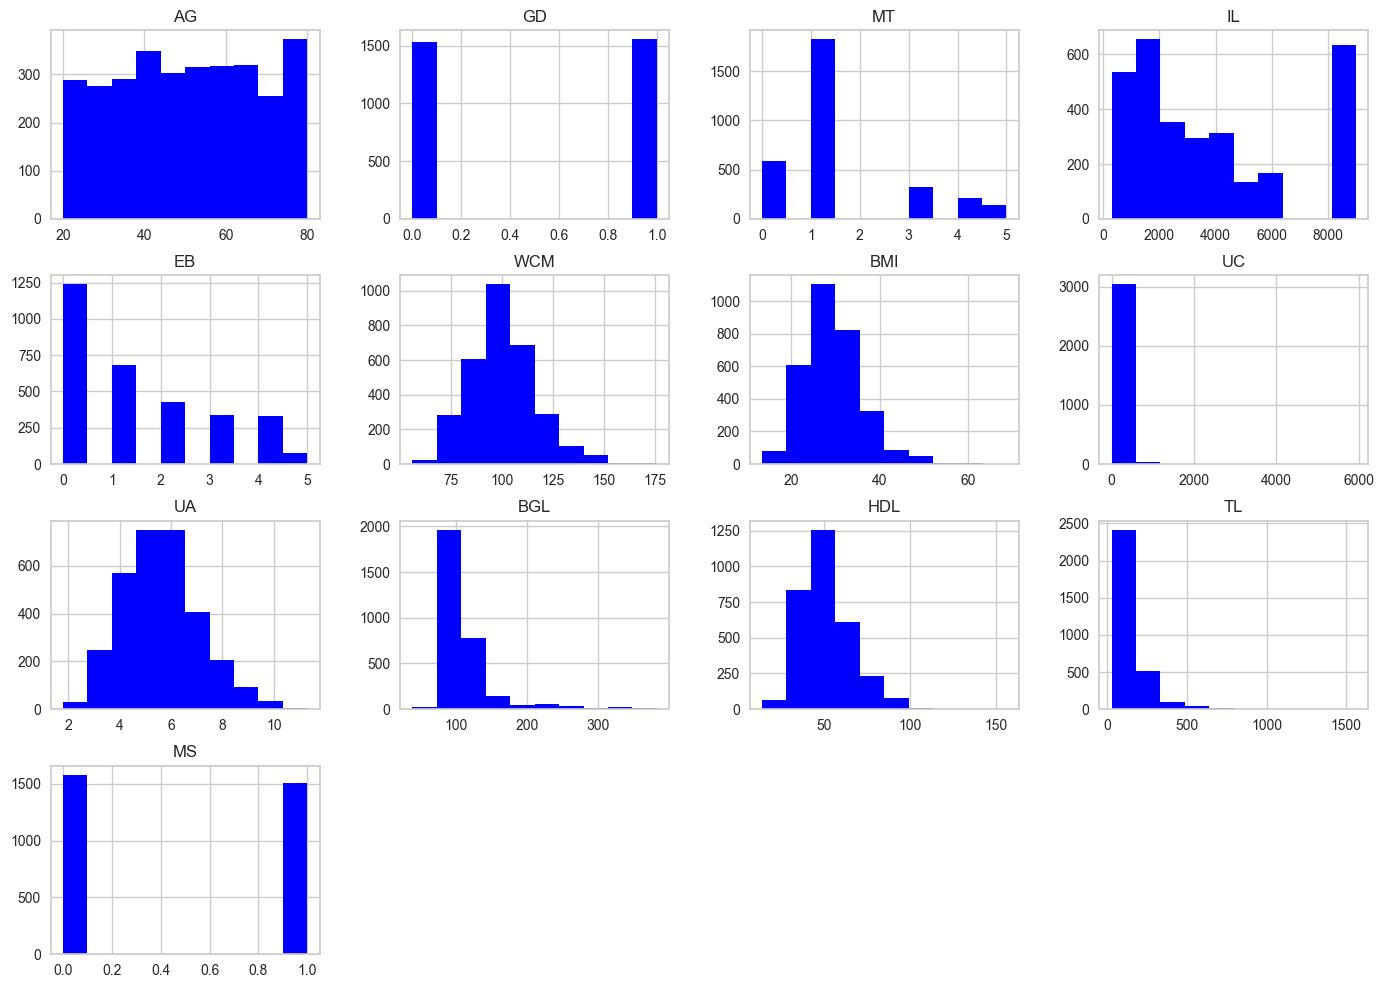

In [26]:
#histogram
df_upsampled.hist(color='blue',bins=10,figsize=(17,12))
plt.show()

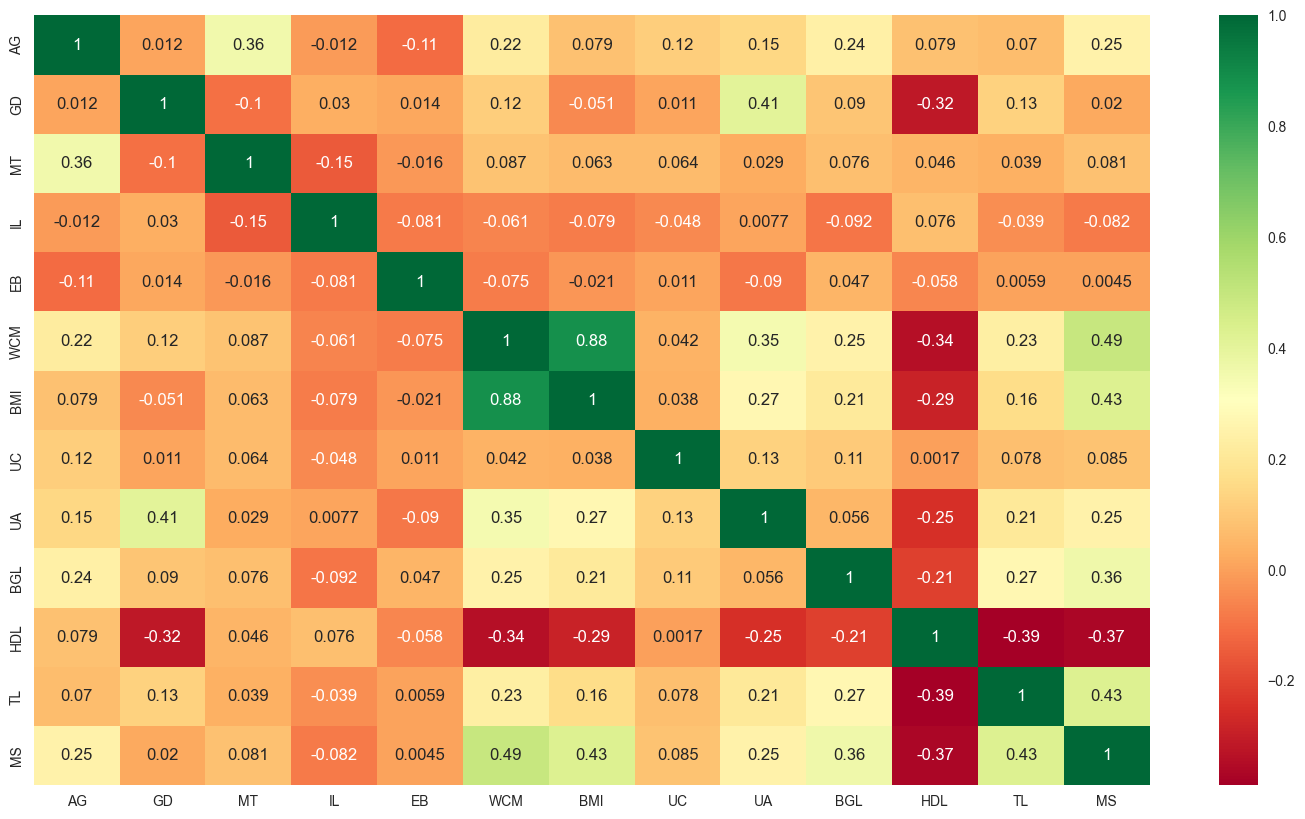

In [27]:
#get correlations of each features in dataset
corrmat = df_upsampled.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(18,10))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

In [28]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# List of categorical features
categorical_features = ['EB', 'GD', 'MT']

# Perform tests for each feature
for feature in categorical_features:
    # Chi-squared test
    contingency_table = pd.crosstab(df_upsampled[feature], df_upsampled['MS'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared test for {feature} vs. MS:")
    print(f"  Chi2 Statistic: {chi2_stat:.3f}")
    print(f"  P-value: {p_value:.3f}")

    # Cramer's V (if association is significant)
    if p_value < 0.05:  # Adjust significance level as needed
        v = cramers_v(df_upsampled[feature], df_upsampled['MS'])
        print(f"  Cramer's V: {v:.3f}")
    print("-" * 30)  # Separator for clarity

Chi-squared test for EB vs. MS:
  Chi2 Statistic: 37.087
  P-value: 0.000
  Cramer's V: 0.102
------------------------------
Chi-squared test for GD vs. MS:
  Chi2 Statistic: 2.830
  P-value: 0.093
------------------------------
Chi-squared test for MT vs. MS:
  Chi2 Statistic: 67.316
  P-value: 0.000
  Cramer's V: 0.142
------------------------------


In [29]:
# IQR method for outlier detection and removal
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Usage for each column (excluding the target variable):
for col in df_upsampled.columns[:-1]:  # Iterate through all columns except the last one
    scaled_data = remove_outliers_iqr(df_upsampled, col)

# Display the data after removing outliers
print(df_upsampled.shape)
df_upsampled.head()

(3089, 13)


AG  GD   MT          IL  EB    WCM   BMI    UC   UA  BGL  HDL   TL  MS
0  22   1  0.0  8200.00000   0   81.0  23.3  3.88  4.9   92   41   84   0
1  44   0  1.0  4500.00000   0   80.1  23.2  8.55  4.5   82   28   56   0
2  21   1  0.0   800.00000   2   69.6  20.1  5.07  5.4  107   43   78   0
3  43   0  0.0  2000.00000   1  120.4  33.3  5.22  5.0  104   73  141   0
4  51   1  1.0  4005.25394   2   81.1  20.1  8.13  5.0   95   43  126   0

## Pycaret

In [30]:
# new_data = df_upsampled.drop('seqn', axis=1)

In [31]:
from pycaret.classification import *
clf_setup = setup(data=df_upsampled,
                  target='MS',
                  session_id=42,
                  preprocess=True,
                  normalize=True,
                  transformation=True,
                  index=False,
                  verbose=True)

In [32]:
print('comparing models for metabolic syndrome data and selecting top 5 out of them based on accuracy score')
top_model = compare_models(n_select = 5, sort='Accuracy')

comparing models for metabolic syndrome data and selecting top 5 out of them based on accuracy score


# Model ensembles

<br>


### 1. K-Fold Cross Validation

Stratified K-Fold Cross Validation is a technique used for evaluating a model. It is particularly useful for classification problems in which the class labels are not evenly distributed i.e data is imbalanced. It is a enhanced version of K-Fold Cross Validation. Key difference is that it uses stratification which allows original distribution of each class to be maintained across each fold. It is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    * Take the group as a hold out or test data set
    * Take the remaining groups as a training data set
    * Fit a model on the training set and evaluate it on the test set
    * Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

**[Tip]** It is better to use `StratifiedKFold` when K-fold CV because it controls the percentage of each class of the target variable.  

<br>

<img 
     src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FluuGW%2FbtrgjGrj9g6%2FNOsrBEQIr2uTRynM2PZ3h1%2Fimg.png">
     
<br>


Source: https://scikit-learn.org/stable/modules/cross_validation.html, https://machinelearningmastery.com/k-fold-cross-validation/


<br><br>


### 2. Stacking

While bagging and boosting used homogenous weak learners for ensemble, Stacking often considers heterogeneous weak learners, learns them in parallel, and combines them by training a meta-learner to output a prediction based on the different weak learner’s predictions. A meta learner inputs the predictions as the features and the target being the ground truth values in data D(Fig 2.), it attempts to learn how to best combine the input predictions to make a better output prediction. 

A general approach for stacking is using meta model as Linear Regression (regression problem) or Logistic Regression (classification problem) to combine the predictions of the sub-models with any learning algorithm.

<br>

<img 
     src="https://editor.analyticsvidhya.com/uploads/39725Stacking.png">
     
<br>


source: https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/

<br><br>

### Creating Meta Learners for Stacking

In [34]:
meta_learner1 = stack_models(estimator_list = [et, rf, catboost, xgboost, lightgbm], meta_model = KNeighborsClassifier())# Define meta learner
meta_learner2 = stack_models(estimator_list = [et, rf, catboost, xgboost, lightgbm], meta_model = LinearDiscriminantAnalysis())# Define meta learner
meta_learner3 = stack_models(estimator_list = [et, rf, catboost, xgboost, lightgbm], meta_model = LogisticRegression())# Define meta learner

In [35]:
evaluate_model(meta_learner1)
evaluate_model(meta_learner2)
evaluate_model(meta_learner3)

In [35]:
print("Top 5 Models are:")
for model in top_model:
  print(type(model).__name__)

Top 5 Models are:
ExtraTreesClassifier
XGBClassifier
LGBMClassifier
CatBoostClassifier
RandomForestClassifier


In [37]:
# Evaluate the stacker model
print(stacker)
evaluate_model(stacker)

StackingClassifier(cv=5,
                   estimators=[('Extra Trees Classifier',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                      

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [38]:
# Finalize the stacker model
final_stacker = finalize_model(stacker)
final_stacker

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['AG', 'GD', 'MT', 'IL', 'EB',
                                             'WCM', 'BMI', 'UC', 'UA', 'BGL',
                                             'HDL', 'TL'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_imputer...
                                                                  max_bin=None,
                                                                  max_cat_to_onehot=None,
                                                                  max_delta_step=None,
                                                                  max_depth=None,
                                                                  max_leaves=None,
                                                                  min_child_weight=None,
                                                                  missing=nan,
                                                                  monotone_constraints=None,
                                                                  n_estimators=100,
                                                                  n_jobs=None,
                                                                  num_parallel_tree=None,
                                                                  objective='binary:logistic',
                                                                  predictor=None,
                                                                  random_state=None,
                                                                  reg_alpha=None, ...),
                                    n_jobs=-1, passthrough=True,
                                    stack_method='auto', verbose=0))],
         verbose=False)

### RBM

In [33]:
stacking1 = stack_models(estimator_list = [svm, knn, dt, et, gbc, ada], meta_model = LogisticRegression(), fold=10, method='auto')

In [34]:
evaluate_model(stacking1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### BBM

In [36]:
# Create a stacked ensemble model
stacking2 = stack_models(estimator_list = [et, rf, dt, gbc, ada, knn], meta_model = LogisticRegression(), fold=10, method='auto')

In [65]:
evaluate_model(stacking2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Implementing SHAP XAI Shapley Additive exPlanations

In [39]:
import shap
shap.initjs()

In [40]:
# Defining the Dependedent and the Independent Variable
X = df_upsampled.drop('MS', axis=1)
y = df_upsampled['MS']

In [ ]:
# Instead of passing the pipeline object directly, pass a function
# that calls the pipeline's 'predict' method:

# Explain the model's predictions using SHAP values
# The lambda function creates a callable object that takes data as input and
# returns the predictions of the final_stacker pipeline's predict_proba method.
explainer = shap.Explainer(lambda x: final_stacker.predict_proba(x)[:,1], X)
shap_values = explainer(X)

PermutationExplainer explainer:  69%|██████████████████████████████▏             | 2122/3089 [1:01:19<29:23,  1.82s/it]

In [45]:
np.shape(shap_values.values)

(3089, 12)

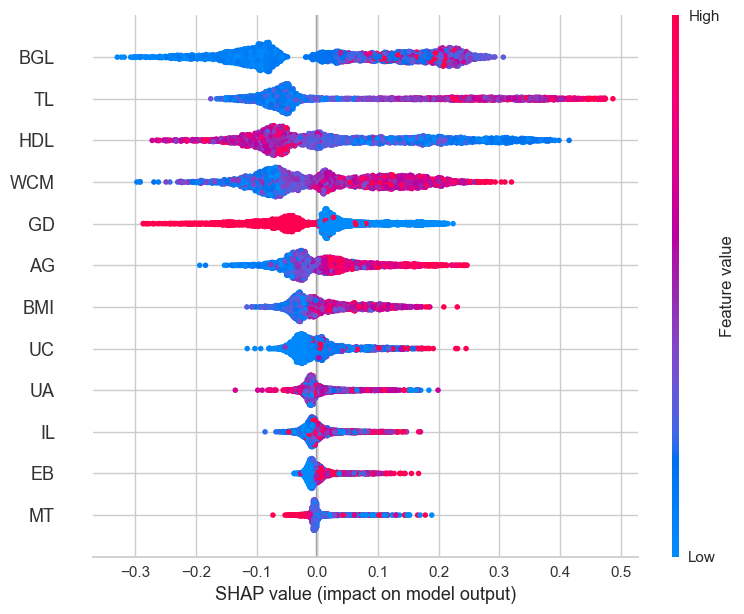

In [46]:
shap.summary_plot(shap_values, X)

In [47]:
shap.plots.force(shap_values[0])

In [48]:
shap.plots.force(shap_values[0:100])

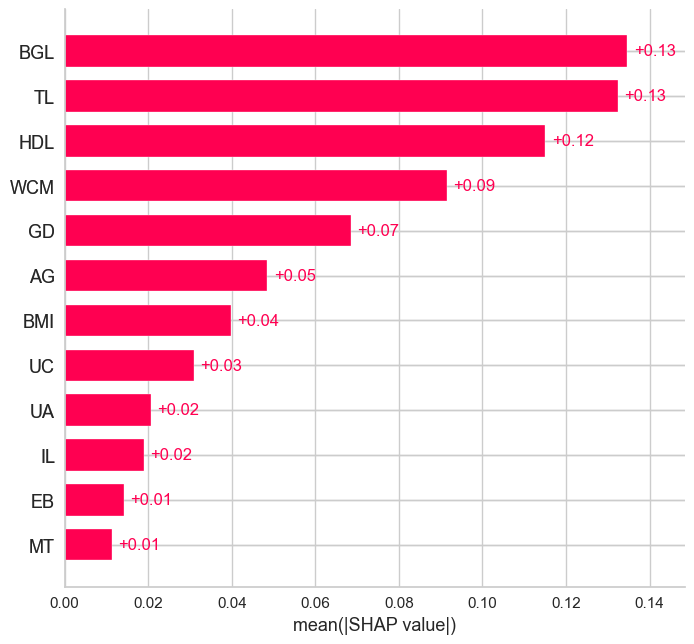

In [49]:
shap.plots.bar(shap_values, max_display=len(shap_values.feature_names))

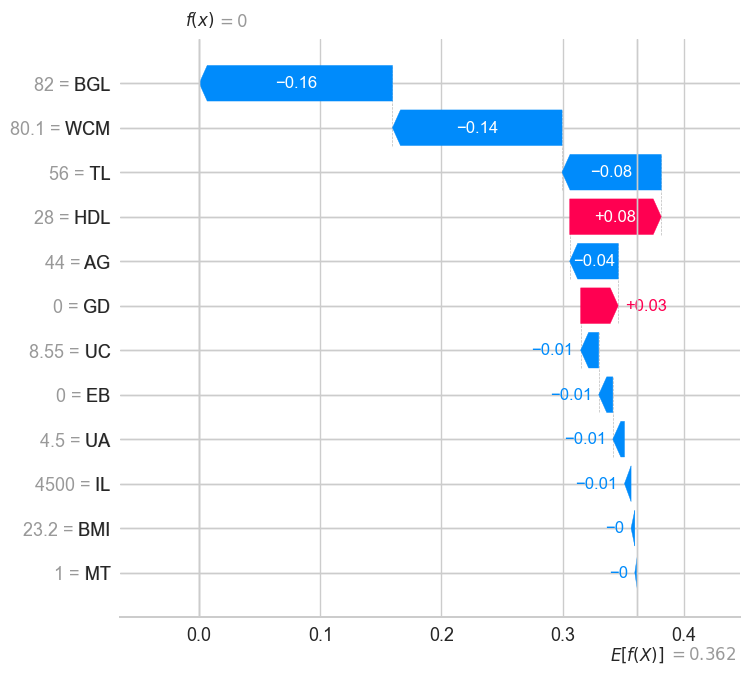

In [50]:
shap.plots.waterfall(shap_values[1], max_display=len(shap_values.feature_names))

In [51]:
#shap.plots.heatmap(shap_values[10], max_display=len(shap_values.feature_names))

## LIME Local  Interpretable Model-agnostic Explanations

In [52]:
#pip install lime

import lime
import lime.lime_tabular

In [53]:
# Create a LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X.values,  # Use the NumPy array representation of X
    feature_names=X.columns.tolist(), # Feature names for interpretability
    class_names=['No MS', 'MS'], # Class names
    mode='classification' # or 'regression' depending on the task
)

In [54]:
# Choose an instance to explain
instance_index = 5 # Example: explain the first instance
instance = X.iloc[instance_index]

In [55]:
# Explain the instance
explanation = explainer.explain_instance(
    instance.values,
    lambda x: final_stacker.predict_proba(pd.DataFrame(x, columns=X.columns)), # Use a lambda function to wrap the prediction
    num_features=13 # Number of features to show in explanation
)

In [56]:
# Show the explanation
explanation.show_in_notebook(show_table=True)

In [57]:
explanation.as_list()

[('79.00 < TL <= 114.00', -0.18576397293408667),
 ('102.00 < BGL <= 114.00', 0.17795073893927682),
 ('0.00 < GD <= 1.00', -0.14343062069627438),
 ('WCM > 109.80', 0.131018792442582),
 ('AG > 64.00', 0.11169033969469873),
 ('EB <= 0.00', -0.032664488455770864),
 ('24.80 < BMI <= 28.70', -0.031001394590115815),
 ('41.00 < HDL <= 49.00', 0.01723790311794693),
 ('7.50 < UC <= 14.87', 0.010046443190887898),
 ('4.60 < UA <= 5.50', -0.008633057700328916),
 ('IL <= 1600.00', -0.006055668406125825),
 ('MT > 1.39', -0.0025708011496292887)]

In [58]:
# Choose another instance to explain
instance_index_2 = 15 # explain the 15th instance
instance_2 = X.iloc[instance_index_2]

# Explain the second instance
explanation_2 = explainer.explain_instance(
    instance_2.values,
    lambda x: final_stacker.predict_proba(pd.DataFrame(x, columns=X.columns)),
    num_features=10  # Number of features to show in explanation
)

# Show the second explanation
explanation_2.show_in_notebook(show_table=True)
explanation_2.as_list()

[('49.00 < HDL <= 59.00', -0.15625680739087897),
 ('WCM > 109.80', 0.1298677701037314),
 ('94.00 < BGL <= 102.00', -0.12661709043337202),
 ('GD <= 0.00', 0.11454366189945829),
 ('BMI > 33.10', 0.05552673540620789),
 ('114.00 < TL <= 169.00', -0.05227228771682054),
 ('4.62 < UC <= 7.50', -0.04584327384890342),
 ('36.00 < AG <= 50.00', -0.0446759203705767),
 ('5.50 < UA <= 6.50', 0.04450580704711386),
 ('EB > 2.00', 0.043494057569442544)]

In [59]:
# Choose yet another instance to explain
instance_index_3 = 100 # Explain the 100th instance
instance_3 = X.iloc[instance_index_3]

# Explain the third instance
explanation_3 = explainer.explain_instance(
    instance_3.values,
    lambda x: final_stacker.predict_proba(pd.DataFrame(x, columns=X.columns)),
    num_features=13  # Number of features to show in explanation
)

# Show the third explanation
explanation_3.show_in_notebook(show_table=True)
explanation_3.as_list()

[('BGL <= 94.00', -0.22731011950984858),
 ('GD <= 0.00', 0.14305091687408833),
 ('HDL > 59.00', -0.13659849397311472),
 ('TL <= 79.00', -0.13027039778259597),
 ('AG <= 36.00', -0.08234618802858756),
 ('90.10 < WCM <= 99.40', -0.06351073220375784),
 ('BMI <= 24.80', -0.04249480692809475),
 ('1600.00 < IL <= 3500.00', -0.020141249244564292),
 ('MT <= 1.00', 0.01830095540492845),
 ('7.50 < UC <= 14.87', 0.009253800875879062),
 ('1.00 < EB <= 2.00', 0.005385247421650303),
 ('UA <= 4.60', -0.004339315843655876)]

# End